In [ ]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn

In [ ]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe = fm.FontEntry (
    fname = r'font/NanumGothic.ttf',
    name = 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)

# pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.family': 'NanumGothic', 'font.size': 14})
# pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
iris = seaborn.load_dataset('iris') # 붓꽃 데이터
titanic = seaborn.load_dataset('titanic') # 타이타닉 데이터
tips = seaborn.load_dataset('tips') # 팁 데이터
flight = seaborn.load_dataset('flights') # 여객기 데이터

### seaborn을 활용한 1차원 분포 플롯
seaborn 패키지에서 제공해주는 여러 가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시 할 수 있음 

#### 1차원 실수 분포 플롯
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도, 러그 플롯을 제공함
`rugplot()` : 데이터 위치를 x축 위에 작은 선분으로 표시 (러그 플롯)  
`kdeplot()` : 히스토그램과 비슷하지만 곡선형태로 표시 (커널 플롯)  


In [ ]:
data = iris.petal_length.values
data

In [ ]:
seaborn.rugplot(data)
plt.title('러그 플롯')
plt.grid(True)
plt.show()

In [ ]:
seaborn.kdeplot(data)
plt.title("커널 밀도 플롯")
plt.grid(True)
plt.show()

### 카운트 
seaborn 패키지의 `countplot()` 메서드로 각 카데고리 별 사이즈를 표시할 수 있음  
`countplot()` 메서드는 데이터프레임만 사용가능  
`countplot(x = '컬럼명', data = 데이터프레임)`

In [ ]:
seaborn.countplot(x = 'embark_town', data = titanic)
plt.title('타이타닉 카운트 플롯')

In [ ]:
tips

In [ ]:
seaborn.countplot(x = 'day', data = tips)
plt.title('요일별 팁')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 데이터
다차원 데이터는 3가지의 경우의 수를 가질 수 있음

- 모든 데이터가 실수형  
- 모든 데이터가 카테고리형  
- 데이터가 실수형과 카테고리형이 섞여 있음

### 2차원 실수형 데이터
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현 할 수 있음  
`jointplot()` : 스캐터 플롯, 등고선 플롯 등을 나타낼 수 있고 양측에 히스토그램을 표현해줌 (데이터 프레임만 사용가능)  

In [ ]:
iris

In [ ]:
seaborn.jointplot(data = iris, x = 'sepal_length', y = 'sepal_width', kind = 'scatter') # scatter : 스캐터 플롯
plt.suptitle('꽃 받침의 길리와 넓이 비교 Joint plot', y = 1.02)
plt.grid(True)
plt.show()

In [ ]:
seaborn.jointplot(data = iris, x = 'sepal_length', y = 'sepal_width', kind = 'kde')  # kde : 커널밀도 히스토그램 그림
plt.suptitle('꽃 받침의 길리와 넓이 비교 Joint plot', y = 1.02)
plt.grid(True)
plt.show()

### 다차원 실수형 데이터
3차원 이상의 데이터라면 `pairplot()` 메서드로 그리드 형태의 스캐터 플롯의 행렬을 만들어 줌  
같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현 

In [ ]:
seaborn.pairplot(iris)
plt.title('다차원 Pari plot')
plt.grid(True)
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 hue 인수에 카테고리 변수 이름을 지정함

In [ ]:
seaborn.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.suptitle('다차원 Pair plot', y=1.02)
plt.show()

### 2차원 카테고리 데이터 
데이터가 2차원이고 모든 값이 카테고리 값이면 `heatmap` 명령을 사용

In [ ]:
titanic_size  = titanic.pivot_table(
index = 'class', columns="sex", aggfunc="size")
titanic_size


In [ ]:
seaborn.heatmap(titanic_size, cmap = seaborn.light_palette('gray' ,as_cmap = True), 
annot = True, fmt = 'd' )
plt.title('히트맵')
plt.show()

### 2차원 복합 데이터
데이터가 2차원이면서 실수 값과 카테고리 값이 섞여 있다면 기존 플롯 외의 다른 플롯을 사용 할 수 있음

`barplot` : 카테고리 값에 따른 실수 값의 평균과 표준 편차를 바 형태로 표시  
평균은 막대 그래프로, 편차는 에러바로 표현

In [ ]:
seaborn.barplot(data = tips, x = 'day', y = 'total_bill' )
plt.title('바 플롯')
plt.grid(True)
plt.show()

`boxplot()` : 사분위수와 아웃라이어라는 데이터를 표현하는 방법

In [ ]:
seaborn.boxplot(data = tips, x = 'day', y = 'total_bill')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

`violinplot()` : 세로 방향으로 커널 밀도 히스토그램을 그려줌 

In [ ]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stripplot`은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다. `jitter=True`를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 함

In [ ]:
np.random.seed(0)
seaborn.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("스트립 플롯")
plt.grid(True)
plt.show()

`swarmplot`은 `stripplot`과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동

In [ ]:
seaborn.swarmplot(x="day", y="total_bill", data=tips)
plt.title("스왐 플롯")
plt.grid(True)
plt.show()

### Seaborn 활용 다차원 복합 데이터

seaborn에서 제공해주는 플롯 메서드들은 `hue`인수로 카테고리 값을 추가로 지정할 수 있음

In [ ]:
seaborn.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.grid(True)
plt.show()

In [ ]:
seaborn.boxplot(data = tips, x = 'day', y = 'total_bill', hue ='sex')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

In [ ]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill' , hue = 'sex')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stipplot()` , `swarmplot()` , `violinplot()`은 `split`, `dodge` 인수로  
시각화 방법을 변경 할 수 있음

In [ ]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill' , hue = 'sex', split = True)
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

In [ ]:
seaborn.swarmplot(data=tips, x="day", y="total_bill", hue = 'sex', dodge = True)
plt.title("스왐 플롯")
plt.grid(True)
plt.show()

`heatmap`으로도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음

In [ ]:
passenger = flight.pivot(index = 'month', columns = 'year', values = 'passengers')

plt.title('히트맵으로 두 개의 카테고리 값 비교')
seaborn.heatmap(passenger, annot = True,fmt="d", linewidths=1)
plt.show()

### seaborn을 활용한 catplot
색상과 행을 사용해서 3개 이상의 카테고리 값의 분포를 표현

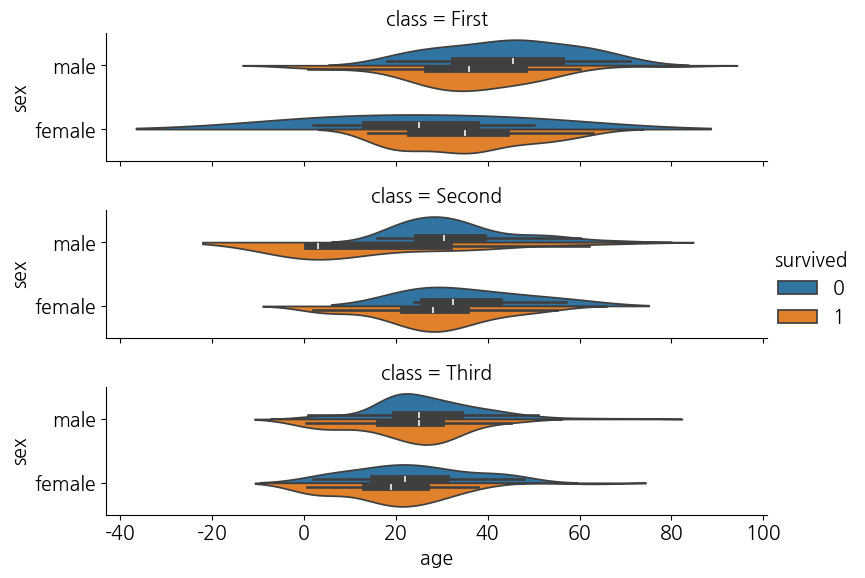

In [43]:
data = titanic[titanic.survived.notnull()]

seaborn.catplot(data = data, x = 'age', y = 'sex', hue = 'survived', row = 'class',
kind = 'violin', split = True, height = 2, aspect= 4 )
plt.suptitle('캣 플롯')